In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import imread, showMatches
from utils import imread
from utils import showMatches
from detectBlobs import detectBlobs
from compute_sift import compute_sift
from computeMatches import computeMatches
from ransac import ransac
from mergeImages import mergeImages
from drawBlobs import drawBlobs
%matplotlib inline

/home/ec2-user/anaconda3/envs/python2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
#Image directory
dataDir = os.path.join('..', 'data', 'stitching')

#Read input images
testExamples = ['hill', 'field', 'ledge', 'pier', 'river' 'roofs', 'building', 'uttower']
exampleIndex = 1
imageName1 = '{}1_r.jpg'.format(testExamples[exampleIndex])
imageName2 = '{}2_r.jpg'.format(testExamples[exampleIndex])
im1 = imread(os.path.join(dataDir, imageName1))
im2 = imread(os.path.join(dataDir, imageName2))

In [4]:
#Detect keypoints
blobs1 = detectBlobs(im1)
blobs2 = detectBlobs(im2)

#Compute SIFT features
sift1 = compute_sift(im1, blobs1[:, 0:4])
sift2 = compute_sift(im2, blobs2[:, 0:4])

sift1_tr = sift1.T
sift2_tr = sift2.T

In [5]:
print (sift1_tr.shape)
print (sift2_tr.shape)

(128, 2614)
(128, 2555)


In [6]:
matches = np.zeros((sift1_tr.shape[1], 1))
for n in range(sift1_tr.shape[1]):
    base = sift1_tr[:, n]
    ssd_min, index = 1e7, -1
    for m in range(sift2_tr.shape[1]):
        curr_ssd = np.sum((base - sift2_tr[:, m])**2)
        if curr_ssd < ssd_min:
            ssd_min = curr_ssd
            index = m
    matches[n] = index

In [7]:
m = matches.reshape(sift1_tr.shape[1], )

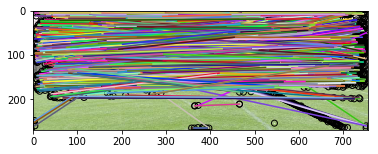

In [8]:
showMatches(im1, im2, blobs1, blobs2, m)

In [ ]:
#def ransac(matches, blobs1, blobs2):

In [11]:
maches = m[500:900,]

In [12]:
maches.shape

(400,)

In [43]:
inliers, transf = ransac(matches, blobs1, blobs2)

array([[ 2.30000000e+01,  3.00000000e+00,  2.00000000e+00,
        -1.00000000e+00,  3.48933227e-02],
       [ 2.80000000e+01,  3.00000000e+00,  2.00000000e+00,
        -1.00000000e+00,  2.33386364e-02],
       [ 1.26000000e+02,  3.00000000e+00,  2.00000000e+00,
        -1.00000000e+00,  3.77365923e-03],
       ...,
       [ 2.62000000e+02,  1.25000000e+02,  8.20000000e+01,
        -1.00000000e+00,  4.90479218e-03],
       [ 2.69000000e+02,  1.25000000e+02,  8.20000000e+01,
        -1.00000000e+00,  4.90050483e-03],
       [ 1.27000000e+02,  1.28000000e+02,  8.20000000e+01,
        -1.00000000e+00,  4.81304992e-03]])

In [47]:
confidence = 0.99;
inlierRatio = 0.3;
epsilon = 1.5;
num_pairs = 3
itr_N = np.ceil(np.log(1 - confidence) / np.log(1 - np.power(inlierRatio, num_pairs)))
num_points = maches.shape[0]
maxInliers = 0

A = np.zeros((2*num_pairs, 2))
b = np.zeros((2*num_pairs, 1))

for i in range(num_pairs):
    print (i)
    A[2*i-1, 0] = 1
    A[2*i, 1] = 1

0
1
2


In [51]:
np.warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)
for i in range(itr_N):
    sampleIndicies = np.random.permutation(num_points, num)[:num_pairs]
    samples1 = blobs1[]

In [59]:
blob_d1 = blobs1[:, [0, 1, 2]]
blob_d2 = blobs2[:, [0, 1, 2]]
sampleIndicies = np.random.permutation(num_points)[:num_pairs]
samples1 = blobs1[sampleIndicies, :]
samples2 = blobs2[sampleIndicies, :]
for j in range(num_pairs):
    b[2*j-1] = samples1[j, 0] - samples2[j, 0]
    b[2*j-1] = samples1[j, 1] - samples2[j, 1]
t, resid,rank,s = np.linalg.lstsq(A, b)
T = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])

In [72]:
p_prime = np.dot(T, blob_d2.T)
error = blob_d1.T - p_prime

ValueError: operands could not be broadcast together with shapes (3,2614) (3,2555) 

In [73]:
b

array([[ 0.],
       [ 3.],
       [ 0.],
       [ 2.],
       [ 0.],
       [-2.]])

In [ ]:
for i = 1:m
    sampleIndicies = randperm(NPoints, Npairs);
    
    samples = data(sampleIndicies,:,:);
    
    pair0=samples(:,:,1);
    pair1=samples(:,:,2);

    for j = 1:Npairs
        b(2*j-1) = pair0(j,1)-pair1(j,1);
        b(2*j) = pair0(j,2)-pair1(j,2);
    end
    t = A \ b;
    T = [1 0 t(1); 0 1 t(2); 0 0 1];
    
    
    p_prime = T * data(:,:,2)';
    error = data(:,:,1)' - p_prime;
    SE = error .^ 2;
    SSE = sum(SE);
    
    numInliers=sum(SSE<epsilon);
    
    % if better
    if numInliers > MaxInliers
        bestSet = find(SSE<epsilon);
        MaxInliers = numInliers;
    end
end